# Задача T-2

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns

## Генерируем выборку

In [193]:
n = 25
sample = np.random.exponential(scale=1.0, size=n)

In [194]:
print(sample)

[0.03742463 0.94618928 1.73543986 3.45710309 0.16349454 1.37909137
 0.64491219 2.40911302 0.67298031 3.04789487 0.58048927 0.15650124
 0.04120986 0.90413314 1.75447848 3.42606725 0.4883776  1.87517972
 0.5036188  1.36466635 1.22663997 0.06683848 1.10220684 0.74352409
 0.52255324]


## Мода, медиана, размах, коэффициент асимметрии

In [195]:
mode = stats.mode(sample)[0][0]
med = np.median(sample)
spread = np.max(sample) - np.min(sample)
mean = np.mean(sample)

m3 = 0
m2 = 0

for i in range(n):
    m3 += 1/n*(sample[i] - mean) ** 3
    m2 += 1/n*(sample[i] - mean) ** 2
    
asym = m3/(m2 ** 1.5)


print('Мода: ', mode, '\nМедиана: ', med, '\nРазмах: ', spread, '\nКоэффициент асимметрии', asym)

Мода:  0.037424629723997425 
Медиана:  0.9041331430374029 
Размах:  3.419678464105816 
Коэффициент асимметрии 1.0016859207665145


## Эмпирическая функция распределения, гистограмма и boxplot

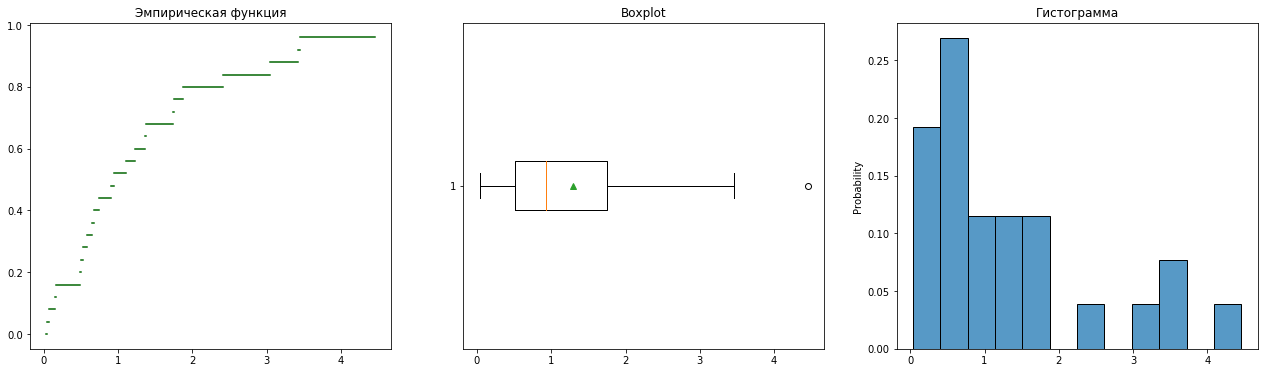

In [197]:
fg, ax = plt.subplots(1, 3, figsize = (22,6))

x = sample.copy()
x.sort()

y = np.arange(0, 1, 1/n)
sample = np.append(sample, np.max(sample)+1)


for i in range (0, n):
    ax[0].plot([x[i], x[i+1]], [y[i], y[i]], color = 'darkgreen')

ax[1].boxplot(x, vert = False, showfliers = True, showmeans = True, showcaps = True, showbox = True);
sns.histplot(x, bins = int(n/2), stat = 'probability', common_norm = 1)

ax[0].set_title('Эмпирическая функция')
ax[1].set_title('Boxplot')
ax[2].set_title('Гистограмма');


## Ядерная оценка плотности распределения

[]

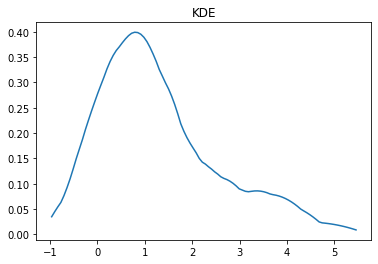

In [198]:
# Берем ядро Епанечникова
def q(y):
    if np.abs(y) >= 1:
        return 0
    else:
        return 0.75*(1-y**2)
    
s = (m2*n/(n-1))**0.5
h = 2.344*s/(n**0.2)

size = 100
kde = []
z = np.linspace(np.min(x)-1, np.max(x)+1, size)
for i in range(0, size):
    k = 0
    for j in range(0, len(x)):
        k += q((z[i]-x[j])/h)
    kde.append(k/(n*h))

plt.plot(z, kde)
plt.title('KDE')
plt.plot()

## Бутстраповская оценка плотности распределения среднего арифметического


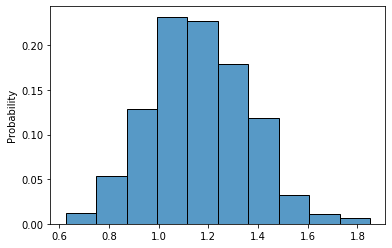

In [200]:
means = []

for s in range (0, 1000):
    i = np.random.randint(0, n, n)
    xi = []
    for j in i:
        xi.append(x[j])

    means.append(np.mean(xi))
    

sns.histplot(means, bins = 10, stat = 'probability', common_norm = 1);

## Бутстраповская оценка плотности распределения коэффициента асимметрии

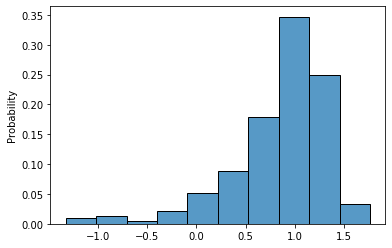

In [201]:

asymmetry = []


for s in range (0, 1000):
    i = np.random.randint(0, n, n)
    xi = []
    for j in i:
        xi.append(x[j])

    for j in range (0, n):
        m3 += 1/n*(xi[j] - mean)**3
        m2 += 1/n*(xi[j] - mean)**2

    asymmetry.append(m3/(m2**1.5))
    m3 = m2 = 0
    

sns.histplot(asymmetry, bins = 10, stat = 'probability', common_norm = 1);